In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('car_data.csv')

In [97]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [98]:
df.shape

(301, 9)

In [99]:
print(df.Seller_Type.unique())
print(df.Fuel_Type.unique())
print(df.Owner.unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [100]:
df.drop('Car_Name', axis = 'columns')

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [101]:
# No of Years
df['Current_Year'] = 2020
df['No_of_years'] = df['Current_Year'] - df['Year']
df = df.drop(['Year','Current_Year' , 'Car_Name'] , axis = 'columns')

In [102]:
#onehotencoding
df = pd.get_dummies(df, drop_first = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [103]:
X = df.drop('Selling_Price' , axis  = 'columns')
y = df['Selling_Price']

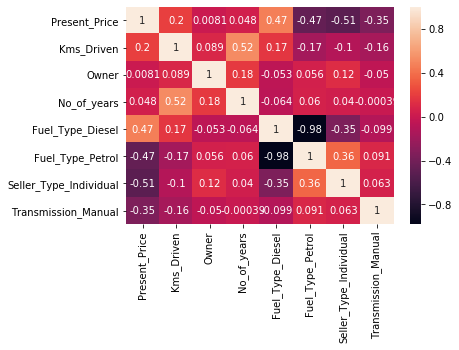

In [104]:
corr = X.corr()
sns.heatmap(corr,annot = True)

In [105]:
df.drop('Fuel_Type_Diesel', axis = 'columns')

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,1,0,1
1,4.75,9.54,43000,0,7,0,0,1
2,7.25,9.85,6900,0,3,1,0,1
3,2.85,4.15,5200,0,9,1,0,1
4,4.60,6.87,42450,0,6,0,0,1
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,0,0,1
297,4.00,5.90,60000,0,5,1,0,1
298,3.35,11.00,87934,0,11,1,0,1
299,11.50,12.50,9000,0,3,0,0,1


In [106]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

c:\users\aniru\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [107]:
print(model.feature_importances_)

[2.69019351e-01 3.18159983e-02 5.01557269e-04 8.29091301e-02
 2.88126783e-01 1.62972085e-04 1.39524815e-01 1.87939393e-01]


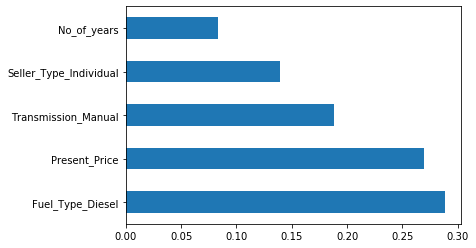

In [108]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    for algo_name, config in algos.items():
        rcv =  RandomizedSearchCV(config['model'], config['params'], cv=5,verbose=10,n_iter = 10, return_train_score=False)
        rcv.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':rcv.best_score_,
            'best_params':rcv.best_params_
        })
    return rcv
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X_train,y_train)

c:\users\aniru\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.850, total=   0.0s
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.910, total=   0.0s
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.756, total=   0.0s
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.662, total=   0.0s
[CV] normalize=True ..................................................
[CV] ...................... normalize=True, score=0.841, total=   0.0s
[CV] normalize=False .................................................
[CV] ..................... normalize=False, score=0.850, total=   0.0s
[CV] normalize=False .................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_di

In [121]:
rcv = DecisionTreeRegressor(splitter='best' ,criterion = 'mse')
rcv.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [114]:
prediction = rcv.predict(X_test)

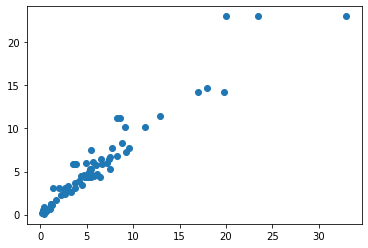

In [115]:
plt.scatter(y_test,prediction)

In [116]:
import pickle 
file = open('rfr_model.pkl','wb')
pickle.dump(rcv,file)